In [1]:
import pandas  as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.mlab as mlab
import matplotlib
from matplotlib import style
plt.style.use('Solarize_Light2')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (20,8)

pd.options.mode.chained_assignment = None


In [2]:
df = pd.read_csv('1819moist.csv')

df

,Zone,Sample Date,Dataset,Moisture (Avg) (%),Moisture (Min) (%),Moisture (Max) (%)
0,11 Green,2024-07-18 10:23:37,1,28.2,20,35
1,04 Green,2024-07-18 10:26:23,1,29.5,19,36
2,12 Green,2024-07-18 10:29:56,1,28.1,23,38
3,17 Green,2024-07-18 10:33:17,1,28.9,22,41
4,13 Green,2024-07-18 10:37:05,1,25.1,22,29
5,15 Green,2024-07-18 10:44:14,1,28.4,21,40
6,14 Green,2024-07-18 10:48:11,1,26.4,21,35
7,16 Green,2024-07-18 10:51:39,1,33.5,27,41
8,10 Green,2024-07-18 10:59:06,1,27.8,22,41
9,18 Green,2024-07-18 11:02:54,1,27.3,22,32


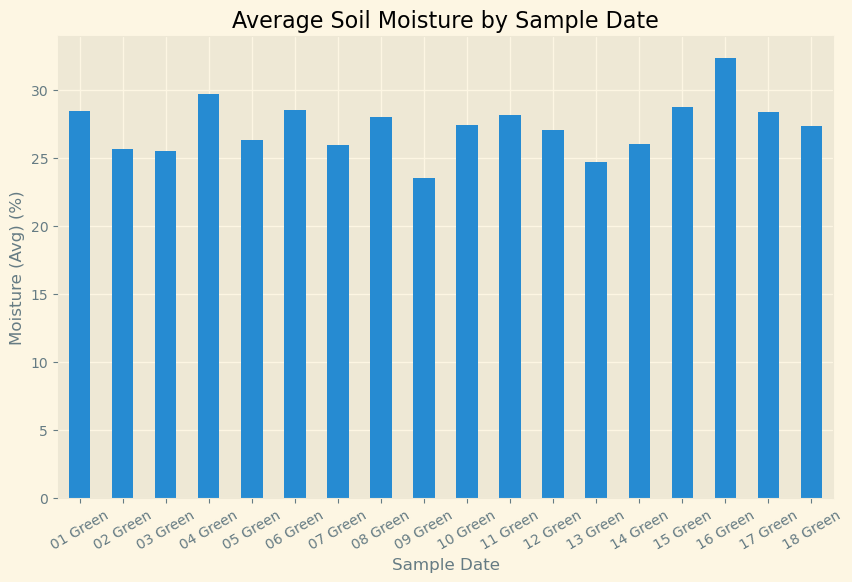

In [3]:
grouped_df = df.groupby('Zone')[['Moisture (Avg) (%)']].mean()

# Plotting the bar chart
grouped_df.plot(kind='bar', figsize=(10, 6), legend=False)
plt.title('Average Soil Moisture by Sample Date')
plt.xlabel('Sample Date')
plt.ylabel('Moisture (Avg) (%)')
plt.xticks(rotation=30)
plt.show()

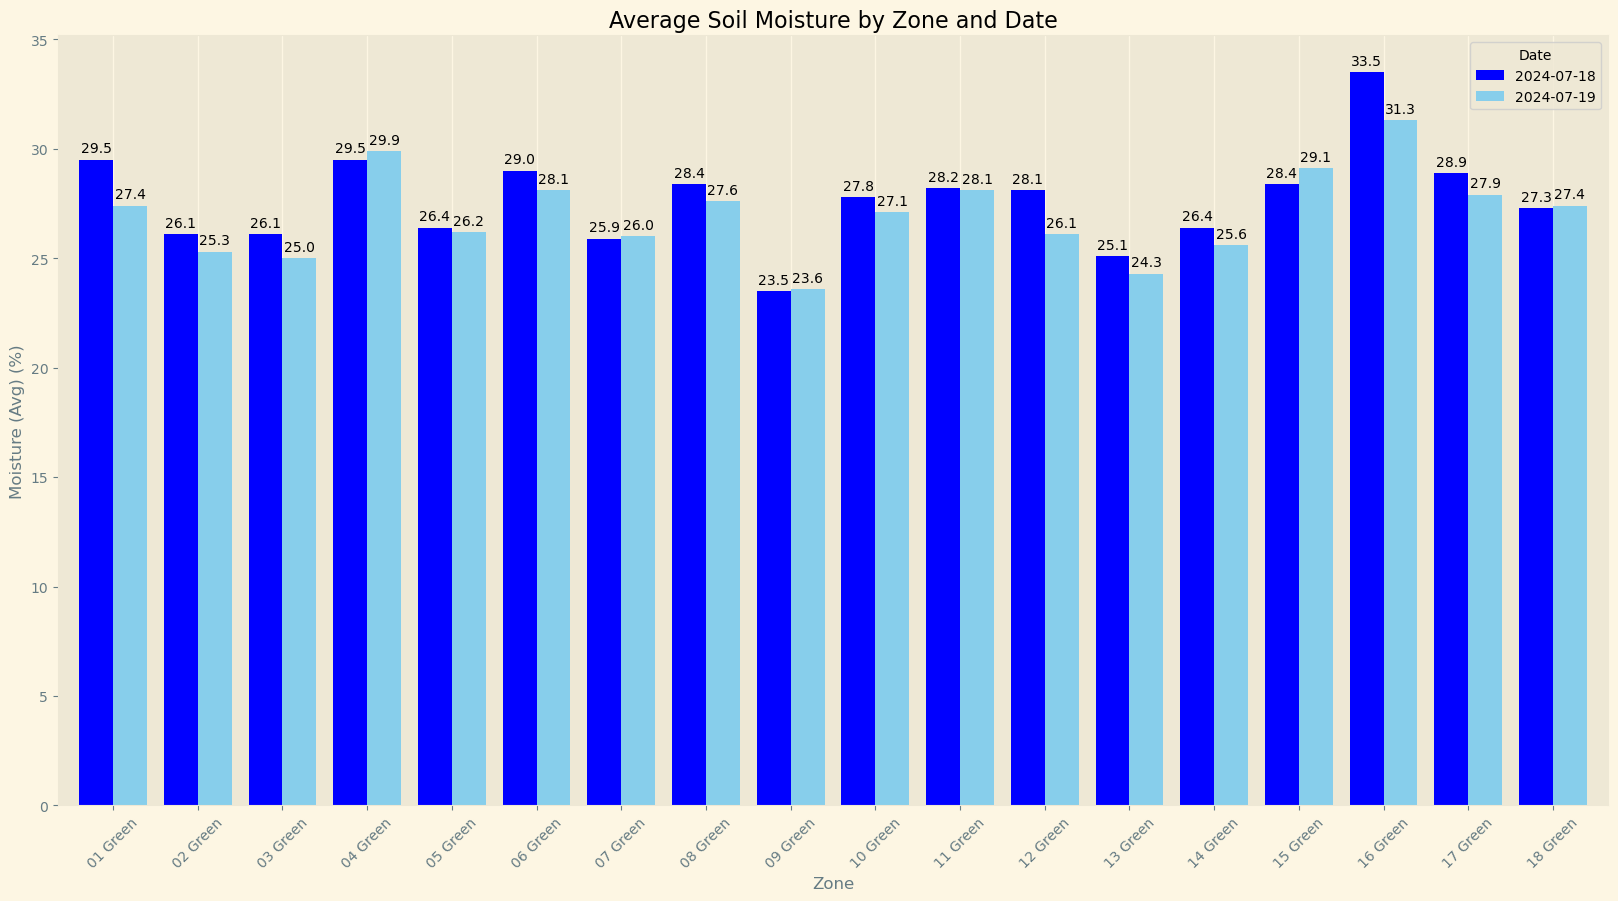

In [4]:
df['Sample Date'] = pd.to_datetime(df['Sample Date'])

# Extract just the date part from 'Sample Date'
df['Date'] = df['Sample Date'].dt.date

# Group by 'Zone' and 'Date' to calculate mean soil moisture
grouped_df = df.groupby(['Zone', 'Date'])['Moisture (Avg) (%)'].mean().unstack()

# Plotting
ax = grouped_df.plot(kind='bar', figsize=(20, 10), width=0.8, color=['Blue', 'skyblue'])
plt.title('Average Soil Moisture by Zone and Date')
plt.xlabel('Zone')
plt.ylabel('Moisture (Avg) (%)')
plt.xticks(rotation=45)
plt.legend(title='Date')
plt.grid(axis='y')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 8), 
                textcoords='offset points')


# Display the plot
plt.show()

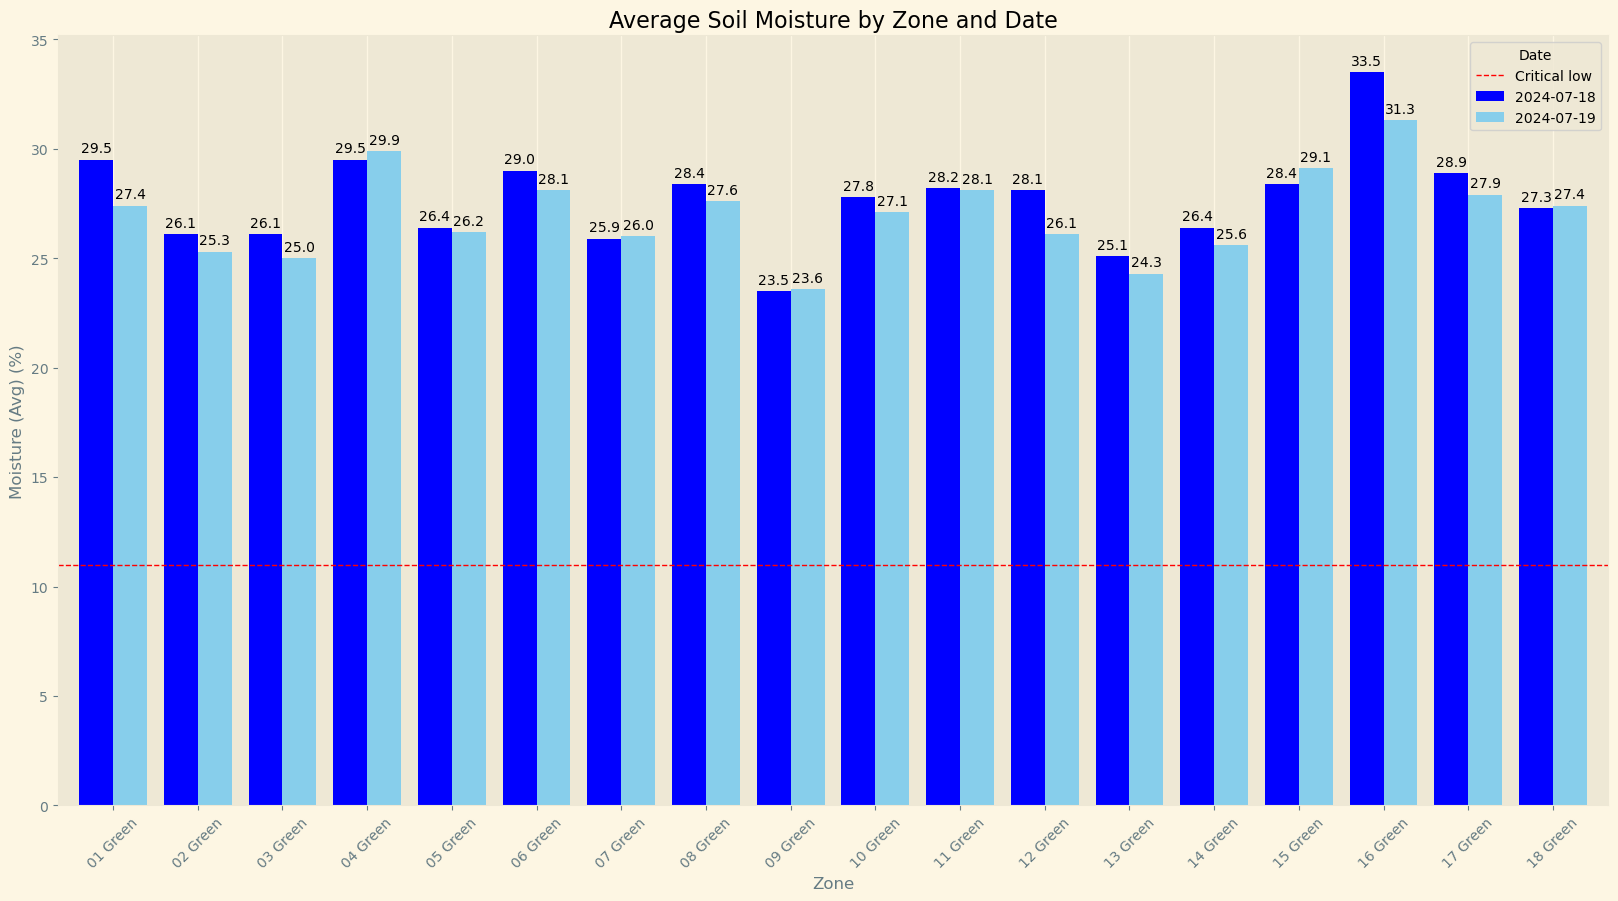

In [5]:
# Convert 'Sample Date' to datetime
df['Sample Date'] = pd.to_datetime(df['Sample Date'])

# Extract just the date part from 'Sample Date'
df['Date'] = df['Sample Date'].dt.date

# Group by 'Zone' and 'Date' to calculate mean soil moisture
grouped_df = df.groupby(['Zone', 'Date'])['Moisture (Avg) (%)'].mean().unstack()

# Plotting
ax = grouped_df.plot(kind='bar', figsize=(20, 10), width=0.8, color=['Blue', 'skyblue'])
plt.title('Average Soil Moisture by Zone and Date')
plt.xlabel('Zone')
plt.ylabel('Moisture (Avg) (%)')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Adding annotations
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 8), 
                textcoords='offset points')

# Adding a red dotted line at 11%
plt.axhline(y=11, color='red', linestyle='--', linewidth=1, label='Critical low')

# Adding legend with the red dotted line
handles, labels = ax.get_legend_handles_labels()

ax.legend(handles=handles, title='Date')

# Display the plot
plt.show()

In [6]:
df['Sample Date'] = pd.to_datetime(df['Sample Date'])

# Extract just the date part from 'Sample Date'
df['Date'] = df['Sample Date'].dt.date

# Group by 'Zone' and 'Date' to calculate mean soil moisture
grouped_df = df.groupby(['Zone', 'Date'])['Moisture (Avg) (%)'].mean().unstack()

# Calculate the percentage difference
date_columns = grouped_df.columns
if len(date_columns) == 2:
    grouped_df['Difference (%)'] = grouped_df[date_columns[1]] - grouped_df[date_columns[0]]

# Renaming columns to add "Moisture Avg (%)"
grouped_df.columns = [f'{col} Moisture Avg (%)' if col != 'Difference (%)' else col for col in grouped_df.columns]

grouped_df

,2024-07-18 Moisture Avg (%),2024-07-19 Moisture Avg (%),Difference (%)
Zone,,,
01 Green,29.5,27.4,-2.1
02 Green,26.1,25.3,-0.8
03 Green,26.1,25.0,-1.1
04 Green,29.5,29.9,0.4
05 Green,26.4,26.2,-0.2
06 Green,29.0,28.1,-0.9
07 Green,25.9,26.0,0.1
08 Green,28.4,27.6,-0.8
09 Green,23.5,23.6,0.1


In [7]:
df.head()

,Zone,Sample Date,Dataset,Moisture (Avg) (%),Moisture (Min) (%),Moisture (Max) (%),Date
0,11 Green,2024-07-18 10:23:37,1,28.2,20,35,2024-07-18
1,04 Green,2024-07-18 10:26:23,1,29.5,19,36,2024-07-18
2,12 Green,2024-07-18 10:29:56,1,28.1,23,38,2024-07-18
3,17 Green,2024-07-18 10:33:17,1,28.9,22,41,2024-07-18
4,13 Green,2024-07-18 10:37:05,1,25.1,22,29,2024-07-18


In [8]:
df['Sample Date'] = pd.to_datetime(df['Sample Date'])

# Extract just the date part from 'Sample Date'
df['Date'] = df['Sample Date'].dt.date

# Group by 'Zone' and 'Date' to calculate mean soil moisture
df.groupby(['Zone', 'Date'])['Moisture (Min) (%)'].mean().unstack()

Date,2024-07-18,2024-07-19
Zone,,
01 Green,19.0,20.0
02 Green,19.0,20.0
03 Green,21.0,20.0
04 Green,19.0,26.0
05 Green,22.0,21.0
06 Green,23.0,21.0
07 Green,22.0,20.0
08 Green,22.0,21.0
09 Green,17.0,18.0


In [9]:
df['Sample Date'] = pd.to_datetime(df['Sample Date'])

# Extract just the date part from 'Sample Date'
df['Date'] = df['Sample Date'].dt.date

# Group by 'Zone' and 'Date' to calculate mean soil moisture
grouped_df = df.groupby(['Zone', 'Date'])['Moisture (Min) (%)'].mean().unstack()

# Calculate the percentage difference
date_columns = grouped_df.columns
if len(date_columns) == 2:
    grouped_df['Difference (%)'] = grouped_df[date_columns[1]] - grouped_df[date_columns[0]]

# Renaming columns to add "Moisture Avg (%)"
grouped_df.columns = [f'{col} Moisture min (%)' if col != 'Difference (%)' else col for col in grouped_df.columns]

grouped_df

,2024-07-18 Moisture min (%),2024-07-19 Moisture min (%),Difference (%)
Zone,,,
01 Green,19.0,20.0,1.0
02 Green,19.0,20.0,1.0
03 Green,21.0,20.0,-1.0
04 Green,19.0,26.0,7.0
05 Green,22.0,21.0,-1.0
06 Green,23.0,21.0,-2.0
07 Green,22.0,20.0,-2.0
08 Green,22.0,21.0,-1.0
09 Green,17.0,18.0,1.0


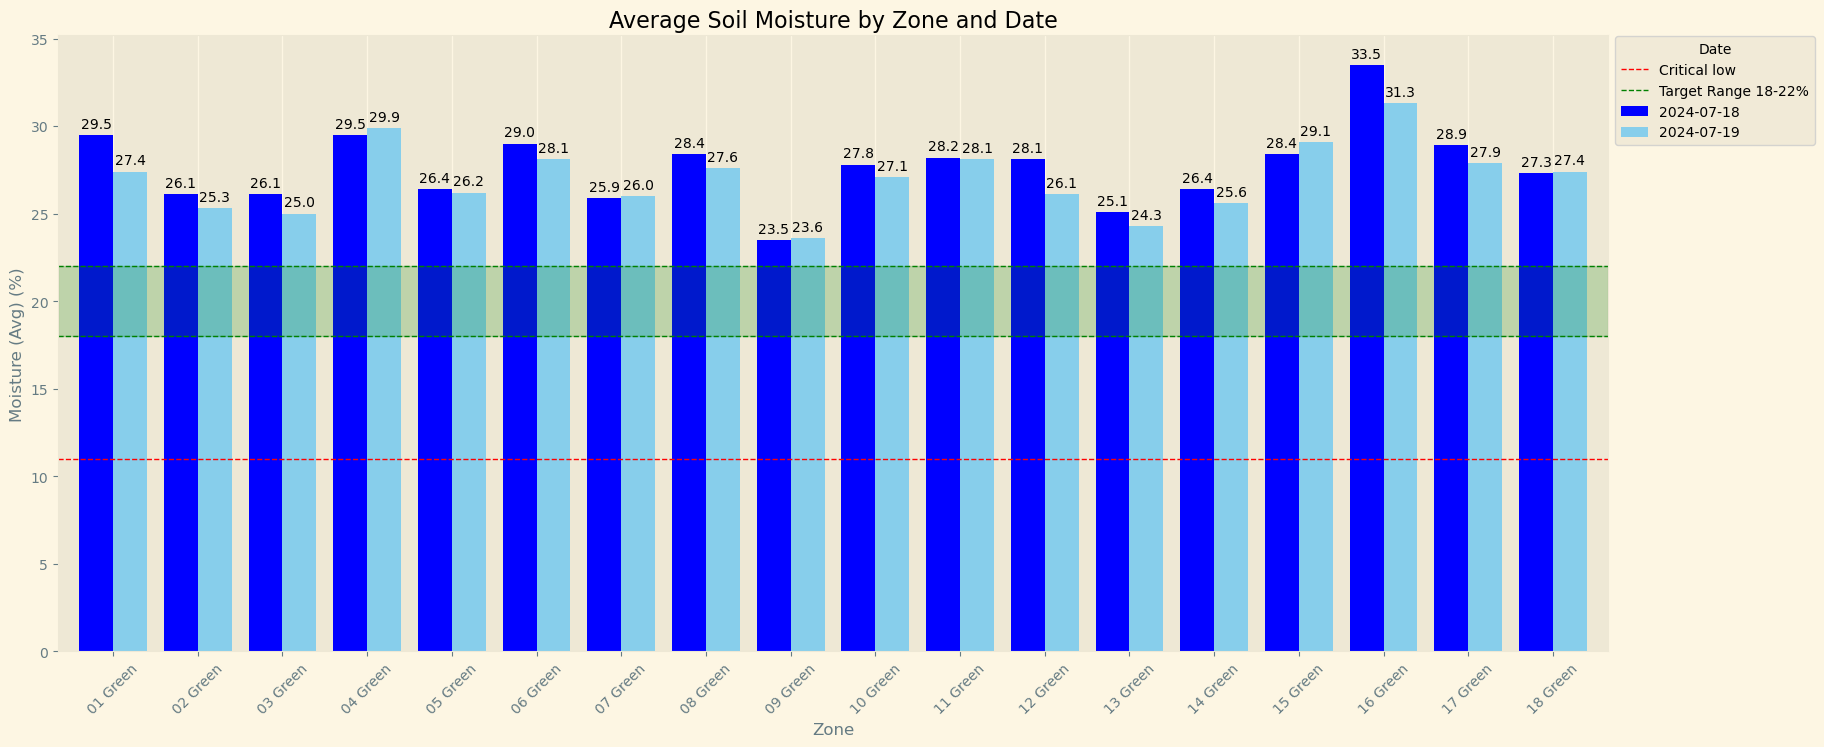

In [13]:
df['Sample Date'] = pd.to_datetime(df['Sample Date'])

# Extract just the date part from 'Sample Date'
df['Date'] = df['Sample Date'].dt.date

# Group by 'Zone' and 'Date' to calculate mean soil moisture
grouped_df = df.groupby(['Zone', 'Date'])['Moisture (Avg) (%)'].mean().unstack()

# Plotting
ax = grouped_df.plot(kind='bar', figsize=(20, 8), width=0.8, color=['Blue', 'skyblue'])
plt.title('Average Soil Moisture by Zone and Date')
plt.xlabel('Zone')
plt.ylabel('Moisture (Avg) (%)')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Adding annotations
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 8), 
                textcoords='offset points')

# Adding a red dotted line at 11%
plt.axhline(y=11, color='red', linestyle='--', linewidth=1, label='Critical low')

# Adding green dotted lines at 18% and 22%
plt.axhline(y=18, color='green', linestyle='--', linewidth=1, label='Target Range 18-22%')
plt.axhline(y=22, color='green', linestyle='--', linewidth=1 )

# Shading the area between 18% and 22% with light green
plt.fill_between(ax.get_xlim(), 18, 22, color='green', alpha=0.2)

# Adding legend with the red and green dotted lines
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, title='Date', loc='upper left', bbox_to_anchor=(1, 1.01))

# Display the plot
plt.show()

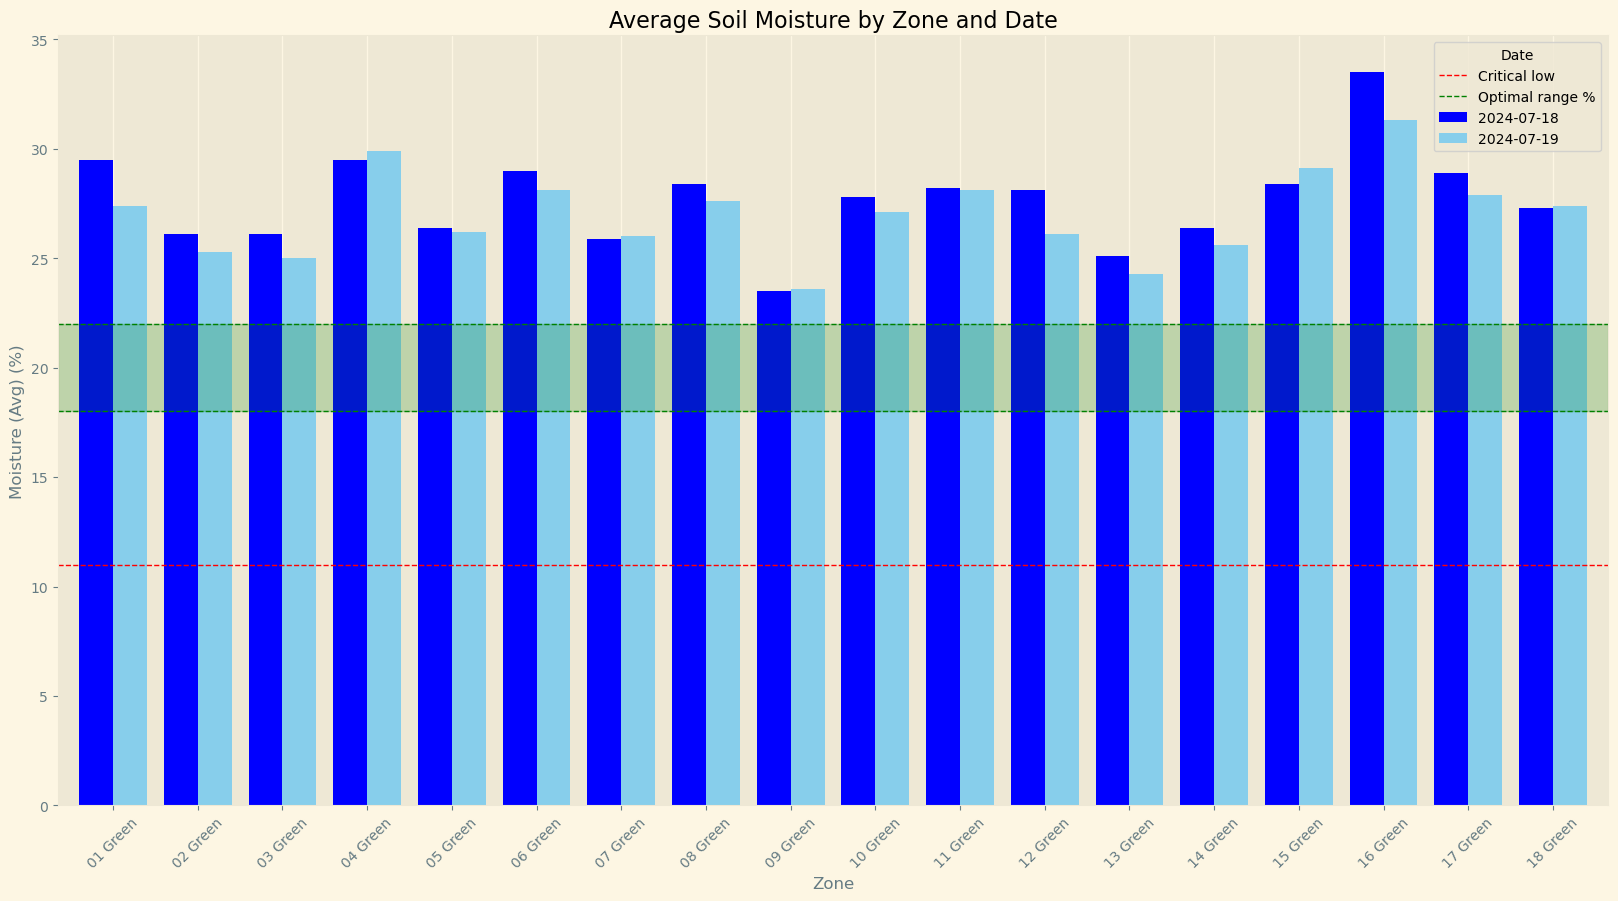

In [11]:
df['Sample Date'] = pd.to_datetime(df['Sample Date'])

# Extract just the date part from 'Sample Date'
df['Date'] = df['Sample Date'].dt.date

# Group by 'Zone' and 'Date' to calculate mean soil moisture
grouped_df = df.groupby(['Zone', 'Date'])['Moisture (Avg) (%)'].mean().unstack()

# Plotting
ax = grouped_df.plot(kind='bar', figsize=(20, 10), width=0.8, color=['Blue', 'skyblue'])
plt.title('Average Soil Moisture by Zone and Date')
plt.xlabel('Zone')
plt.ylabel('Moisture (Avg) (%)')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Adding annotations


# Adding a red dotted line at 11%
plt.axhline(y=11, color='red', linestyle='--', linewidth=1, label='Critical low')

# Adding green dotted lines at 18% and 22%
plt.axhline(y=18, color='green', linestyle='--', linewidth=1, label='Optimal range %')
plt.axhline(y=22, color='green', linestyle='--', linewidth=1 )

# Shading the area between 18% and 22% with light green
plt.fill_between(ax.get_xlim(), 18, 22, color='green', alpha=0.2)

# Adding legend with the red and green dotted lines
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, title='Date')

# Display the plot
plt.show()

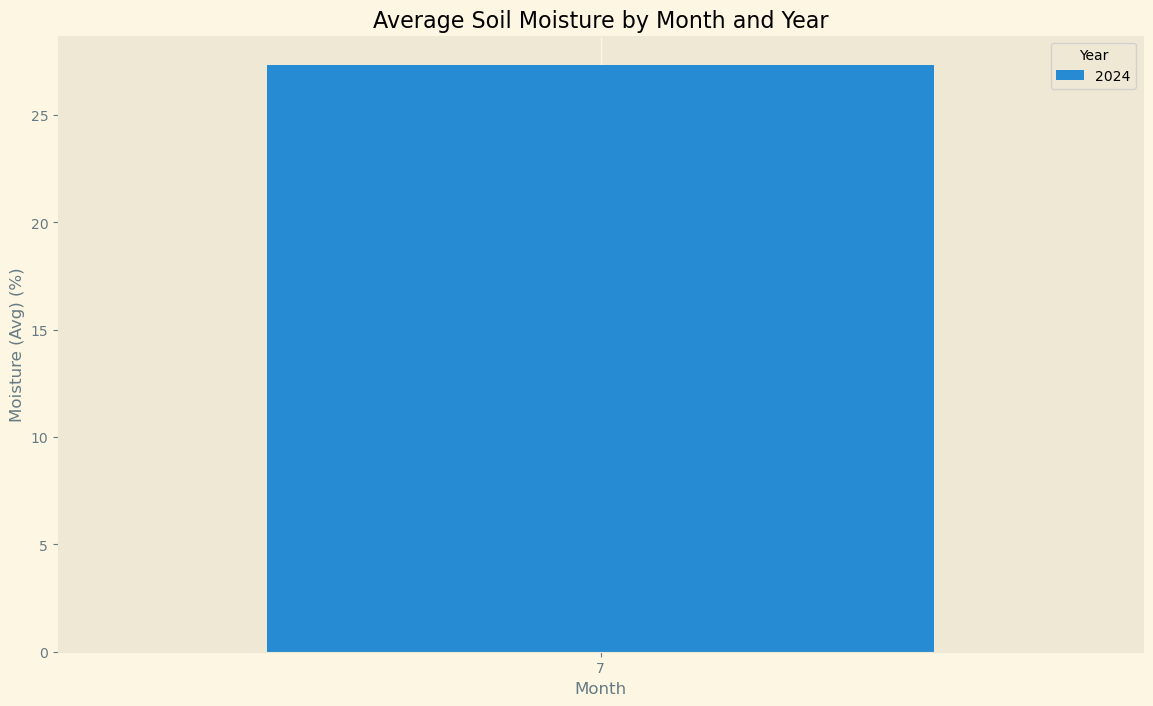

In [12]:
df['Sample Date'] = pd.to_datetime(df['Sample Date'])

# Extract the month and year from 'Sample Date'
df['Year'] = df['Sample Date'].dt.year
df['Month'] = df['Sample Date'].dt.month

# Calculate the average moisture percentage per month per year
monthly_avg_moisture = df.groupby(['Year', 'Month'])['Moisture (Avg) (%)'].mean().unstack()

# Plotting
fig, ax = plt.subplots(figsize=(14, 8))

# Transpose for better plotting
monthly_avg_moisture_transposed = monthly_avg_moisture.T

monthly_avg_moisture_transposed.plot(kind='bar', ax=ax, width=0.8)

plt.title('Average Soil Moisture by Month and Year')
plt.xlabel('Month')
plt.ylabel('Moisture (Avg) (%)')
plt.xticks(rotation=0)
plt.legend(title='Year')
plt.grid(axis='y')

# Display the plot
plt.show()